In [1]:
import json
import logging
from faster_coco_eval import Curves, ErrorCalc

logging.root.setLevel("INFO")
logging.debug("Запись.")

In [2]:
def load(file):
    with open(file) as io:
        _data = json.load(io)
        
    return _data

In [3]:
prepared_coco_in_dict = load('../tests/data/eval_all_coco.json')
prepared_anns         = load('../tests/data/result_annotations.json')

100%|██████████| 3/3 [00:00<00:00, 15.43it/s]


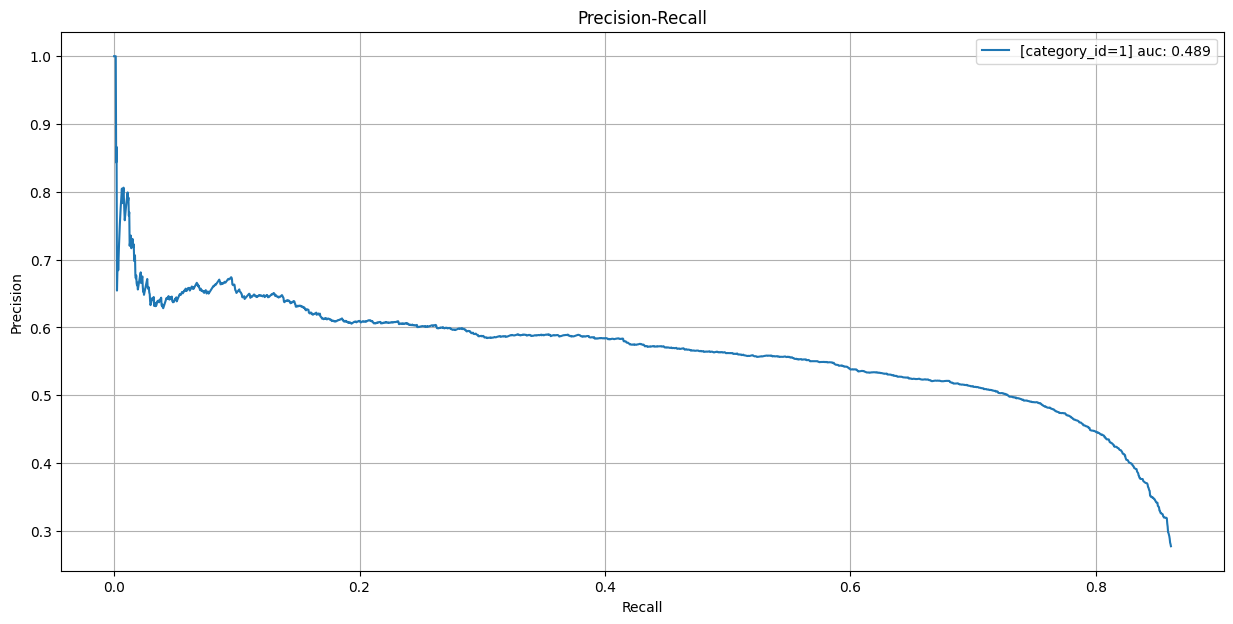

{'auc': [0.4893]}

In [4]:
threshold_iou = 0.5

curves = Curves(prepared_coco_in_dict, iou_tresh=threshold_iou, iouType='segm')
curves.load_result(prepared_anns)
_match_results = curves.match(categories_id=['all'])
curves.plot_pre_rec(_match_results, plotly_backend=False)

In [5]:
ec = ErrorCalc(prepared_coco_in_dict, iouType='bbox', min_score=0.9)
ec.load_result(prepared_anns)
_match_results = curves.match(categories_id=['all'])

100%|██████████| 3/3 [00:00<00:00, 10.99it/s]


In [6]:
confusion_matrix = ec.confusion_matrix(_match_results)
confusion_matrix

array([[2802,  451]], dtype=int32)

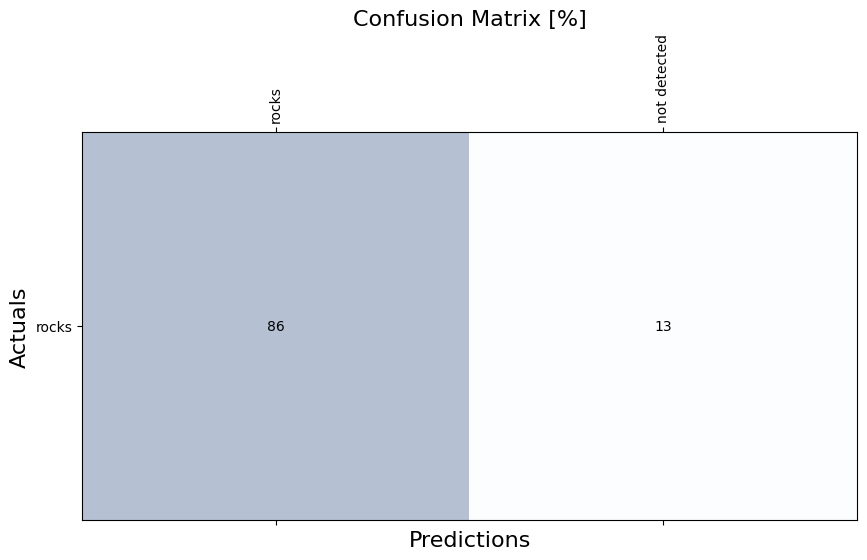

In [7]:
ec.display_matrix(confusion_matrix)

In [8]:
# ec.display_tp_fp_fn(_match_results, display_tp=False)